$$\frac{dy}{dx} = 0$$

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from edo import EDOModel
import sympy as sy

In [28]:
independent_variable = sy.symbols('x')
dependent_variable = sy.Function('y')(independent_variable)
dydx = sy.Derivative(dependent_variable,independent_variable)
eq = sy.Equality(dydx,-dependent_variable)
eq

Eq(Derivative(y(x), x), -y(x))

In [29]:
@tf.function
def trial_solution(net_output:tf.Tensor,x:tf.Tensor,ci:tf.Tensor):
    x0,y0 = ci[0],ci[1]
    return y0 + (x-x0)*net_output

In [30]:
model = EDOModel(activations='sigmoid',
                 dependent_variable=dependent_variable,
                 independent_variable=independent_variable,
                 trial_solution=trial_solution,
                 ci=[0,100],
                 edo_eq=eq,
                 denses=100)
full_size=1000
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))
x = tf.cast(tf.linspace(0,10,full_size)[:,tf.newaxis],dtype=tf.float64)
y = 100*tf.exp(-x)
model.fit(x,y,epochs=1000)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 1s 716us/step - loss: 212335.0706
Epoch 2/1000
32/32 [==============================] - 0s 636us/step - loss: 154967.2275
Epoch 3/1000
32/32 [==============================] - 0s 649us/step - loss: 115217.3489
Epoch 4/1000
32/32 [==============================] - 0s 932us/step - loss: 90478.6980
Epoch 5/1000
32/32 [=============================

In [31]:
y

<tf.Tensor: shape=(1000, 1), dtype=float64, numpy=
array([[1.00000000e+02],
       [9.90039923e+01],
       [9.80179050e+01],
       [9.70416391e+01],
       [9.60750970e+01],
       [9.51181817e+01],
       [9.41707973e+01],
       [9.32328489e+01],
       [9.23042426e+01],
       [9.13848853e+01],
       [9.04746848e+01],
       [8.95735500e+01],
       [8.86813906e+01],
       [8.77981172e+01],
       [8.69236412e+01],
       [8.60578751e+01],
       [8.52007320e+01],
       [8.43521262e+01],
       [8.35119726e+01],
       [8.26801869e+01],
       [8.18566859e+01],
       [8.10413871e+01],
       [8.02342087e+01],
       [7.94350698e+01],
       [7.86438904e+01],
       [7.78605912e+01],
       [7.70850938e+01],
       [7.63173203e+01],
       [7.55571940e+01],
       [7.48046385e+01],
       [7.40595786e+01],
       [7.33219395e+01],
       [7.25916474e+01],
       [7.18686290e+01],
       [7.11528120e+01],
       [7.04441245e+01],
       [6.97424956e+01],
       [6.90478550e+01],

In [32]:
model(x)

<tf.Tensor: shape=(1000, 1), dtype=float64, numpy=
array([[ 1.00000000e+02],
       [ 9.90054017e+01],
       [ 9.80202454e+01],
       [ 9.70445340e+01],
       [ 9.60782595e+01],
       [ 9.51214009e+01],
       [ 9.41739278e+01],
       [ 9.32357997e+01],
       [ 9.23069682e+01],
       [ 9.13873748e+01],
       [ 9.04769564e+01],
       [ 8.95756429e+01],
       [ 8.86833592e+01],
       [ 8.78000266e+01],
       [ 8.69255602e+01],
       [ 8.60598768e+01],
       [ 8.52028871e+01],
       [ 8.43545004e+01],
       [ 8.35146287e+01],
       [ 8.26831785e+01],
       [ 8.18600611e+01],
       [ 8.10451845e+01],
       [ 8.02384570e+01],
       [ 7.94397915e+01],
       [ 7.86490973e+01],
       [ 7.78662892e+01],
       [ 7.70912801e+01],
       [ 7.63239853e+01],
       [ 7.55643194e+01],
       [ 7.48122052e+01],
       [ 7.40675603e+01],
       [ 7.33303059e+01],
       [ 7.26003648e+01],
       [ 7.18776592e+01],
       [ 7.11621189e+01],
       [ 7.04536687e+01],
       [ 6.97

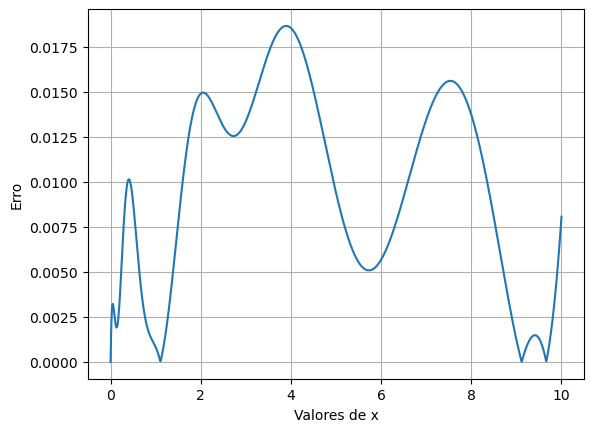

In [37]:
plt.plot(np.linspace(np.min(x),np.max(x),full_size),tf.math.abs(model.predict(x)-y))
plt.xlabel('Valores de x')
plt.ylabel('Erro')
plt.grid()
plt.savefig('imagens/erro_decaimento')

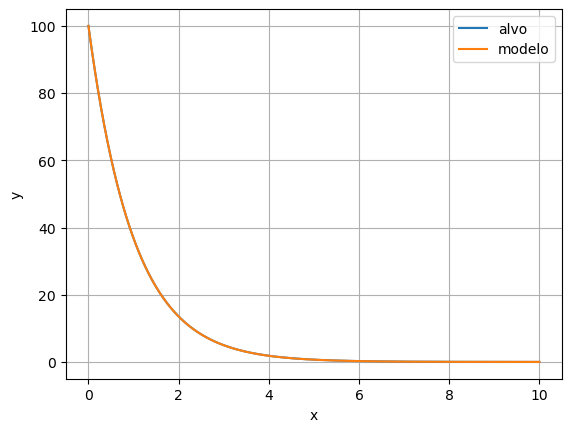

In [34]:
plt.plot(x,y,label='alvo')
plt.plot(x,model(x),label='modelo')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.savefig('imagens/solução_decaimento')